

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [1]:
#
# Import Libraries
#
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [2]:
# Your code to read data
df = pd.read_csv("RSCCASN.csv", index_col='DATE', parse_dates=True)
df.head()
# Print first few rows of data

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [3]:
# Set name of column as 'Sales'. Use - df.columns 
df.columns = ['sales']

Plot your data - Year vs Sales

In [4]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
df.head()

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


<Axes: xlabel='DATE'>

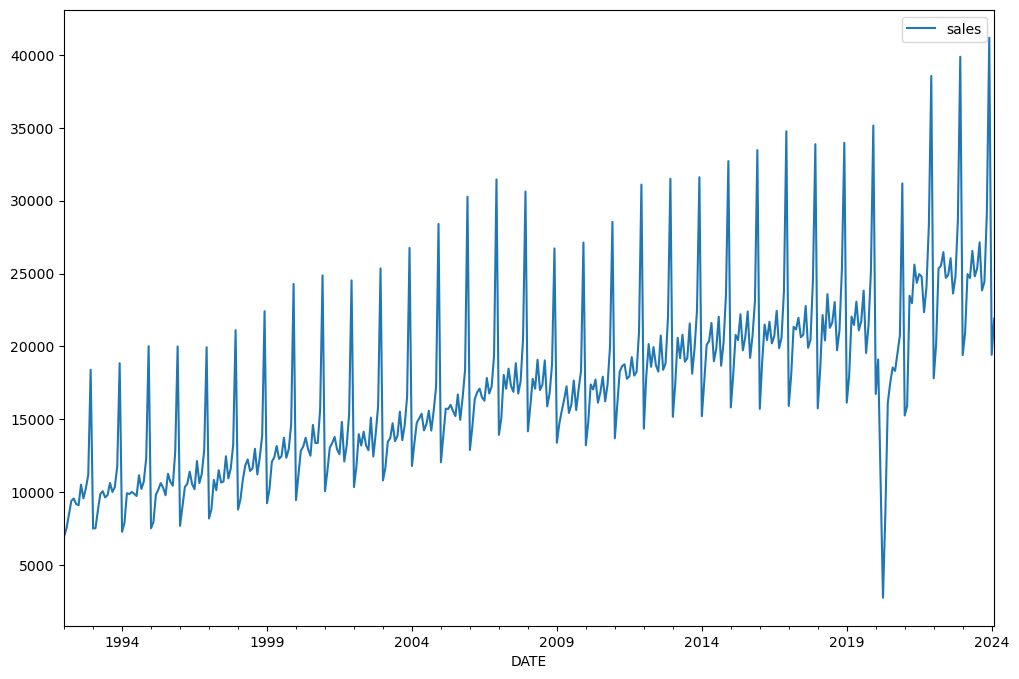

In [5]:
df.plot(figsize=(12,8))

### Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [6]:
test_size = 18

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [7]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
data_length = len(df)
data_length

386

Next, we will separate train and test datasets.

In [8]:
len(df)- 18

368

In [9]:
train_size = data_length- test_size
train_size


368

In [10]:
test_index =  train_size

In [11]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [12]:
print(train.size)
print(test.size)

368
18


In [13]:

train

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2022-04-01,25539.0
2022-05-01,26470.0
2022-06-01,24701.0


In [14]:
test

,sales
DATE,
2022-09-01,23629.0
2022-10-01,24787.0
2022-11-01,28645.0
2022-12-01,39883.0
2023-01-01,19405.0
2023-02-01,20937.0
2023-03-01,24963.0
2023-04-01,24700.0
2023-05-01,26557.0


### In Neural Networks, we need to Scale Data between 0-1

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
#
# Check if the data has been scaled properly
#
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [18]:
print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0732436054953647
0.0
0.4650117279124316


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [20]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [22]:
# We're only using one feature in our time series
n_features = 1

In [23]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='mse')

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [26]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping?
# Your code to create an object early-stop.

Now, fit your model.

In [28]:
# Your code to fit your model.
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [29]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.
history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30

356/356 [==============================] - 3s 4ms/step - loss: 0.0204 - val_loss: 0.0564
Epoch 2/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0300
Epoch 3/30
356/356 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0161
Epoch 4/30
356/356 [==============================] - 1s 4ms/step - loss: 0.0083 - val_loss: 0.0016
Epoch 5/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 0.0075
Epoch 6/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0322
Epoch 7/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0338
Epoch 8/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 5.7823e-04
Epoch 9/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0041 - val_loss: 0.0125
Epoch 10/30
356/356 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0

In [30]:
losses = pd.DataFrame(model.history.history)

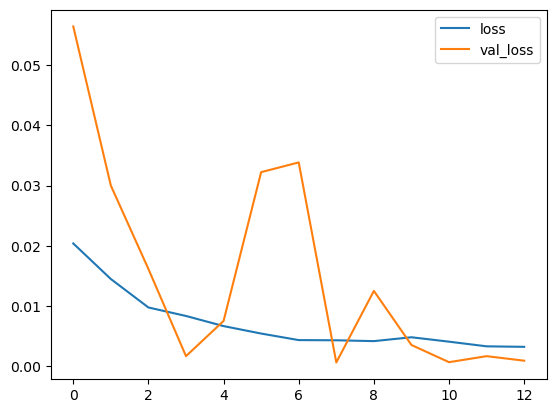

In [31]:
losses.plot();

C:\Users\Murali\AppData\Local\Temp\ipykernel_17744\1836368149.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


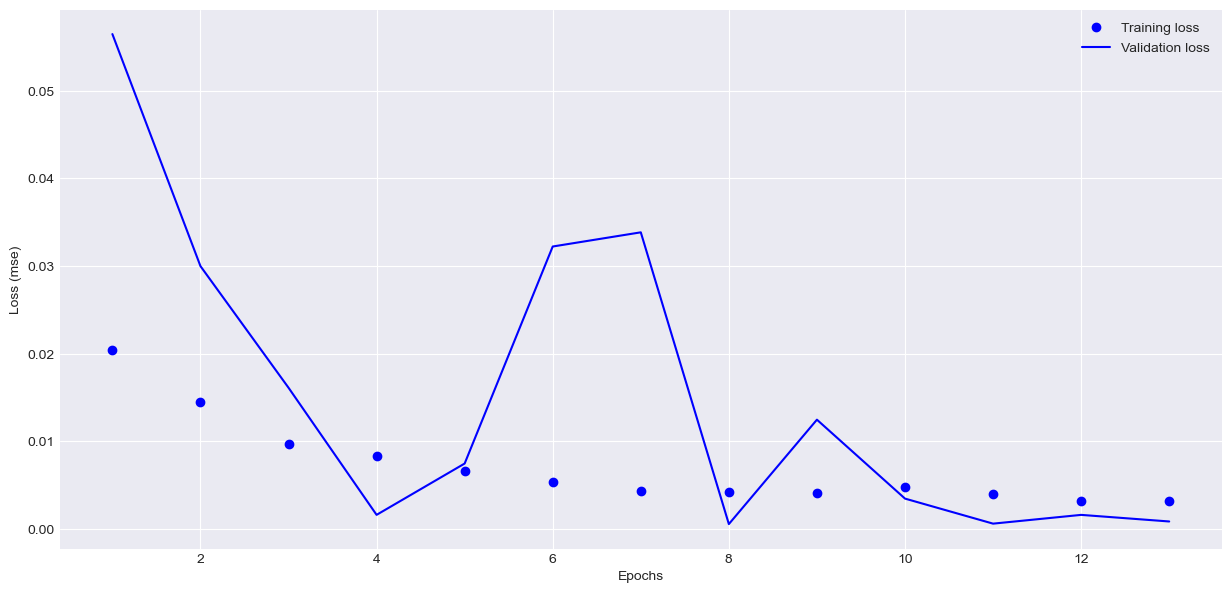

In [32]:
# printing Loss for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()


## Evaluate on Test Data

In [33]:
first_eval_batch = scaled_train[-length:]

In [34]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 374ms/step


array([[0.5419643]], dtype=float32)

In [35]:
# compare with the true result:
scaled_test[0]

array([0.58296102])

#### Try predicting the series!

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.54716296],
        [0.59505194],
        [0.7145091 ],
        [1.        ],
        [0.42066905],
        [0.48587066],
        [0.63093377],
        [0.6362951 ],
        [0.66229197],
        [0.61289512],
        [0.61856361],
        [0.65053613]]])

In [37]:
for i in range(len(test)):
    
    print(i)
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # store prediction
    test_predictions.append(current_pred) 
    print(test_predictions)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    print(current_batch)

0
1/1 [==============================] - 0s 11ms/step
[0.5419643]
[array([0.5419643], dtype=float32)]
[[[0.59505194]
  [0.7145091 ]
  [1.        ]
  [0.42066905]
  [0.48587066]
  [0.63093377]
  [0.6362951 ]
  [0.66229197]
  [0.61289512]
  [0.61856361]
  [0.65053613]
  [0.54196429]]]
1
1/1 [==============================] - 0s 19ms/step
[0.5670338]
[array([0.5419643], dtype=float32), array([0.5670338], dtype=float32)]
[[[0.7145091 ]
  [1.        ]
  [0.42066905]
  [0.48587066]
  [0.63093377]
  [0.6362951 ]
  [0.66229197]
  [0.61289512]
  [0.61856361]
  [0.65053613]
  [0.54196429]
  [0.56703383]]]
2
1/1 [==============================] - 0s 21ms/step
[0.6790499]
[array([0.5419643], dtype=float32), array([0.5670338], dtype=float32), array([0.6790499], dtype=float32)]
[[[1.        ]
  [0.42066905]
  [0.48587066]
  [0.63093377]
  [0.6362951 ]
  [0.66229197]
  [0.61289512]
  [0.61856361]
  [0.65053613]
  [0.54196429]
  [0.56703383]
  [0.67904991]]]
3
1/1 [==============================] - 0s

In [38]:
test_predictions

[array([0.5419643], dtype=float32),
 array([0.5670338], dtype=float32),
 array([0.6790499], dtype=float32),
 array([1.0497782], dtype=float32),
 array([0.42054045], dtype=float32),
 array([0.46358973], dtype=float32),
 array([0.5649786], dtype=float32),
 array([0.593686], dtype=float32),
 array([0.62915975], dtype=float32),
 array([0.5958528], dtype=float32),
 array([0.59680885], dtype=float32),
 array([0.62487876], dtype=float32),
 array([0.5374851], dtype=float32),
 array([0.5472826], dtype=float32),
 array([0.65538967], dtype=float32),
 array([1.1042539], dtype=float32),
 array([0.40939736], dtype=float32),
 array([0.44605333], dtype=float32)]

## Inverse Transformations and Compare

In [39]:
scaler.inverse_transform?

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Murali\AppData\Local\Temp\ipykernel_17744\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


# Check and plot predictions

In [42]:
# Print the test variable.
test

,sales,Predictions
DATE,,
2022-09-01,23629.0,22160.825244
2022-10-01,24787.0,23058.615423
2022-11-01,28645.0,27070.135345
2022-12-01,39883.0,40346.657723
2023-01-01,19405.0,17812.394667
2023-02-01,20937.0,19354.075335
2023-03-01,24963.0,22985.013607
2023-04-01,24700.0,24013.082481
2023-05-01,26557.0,25283.468915


<Axes: xlabel='DATE'>

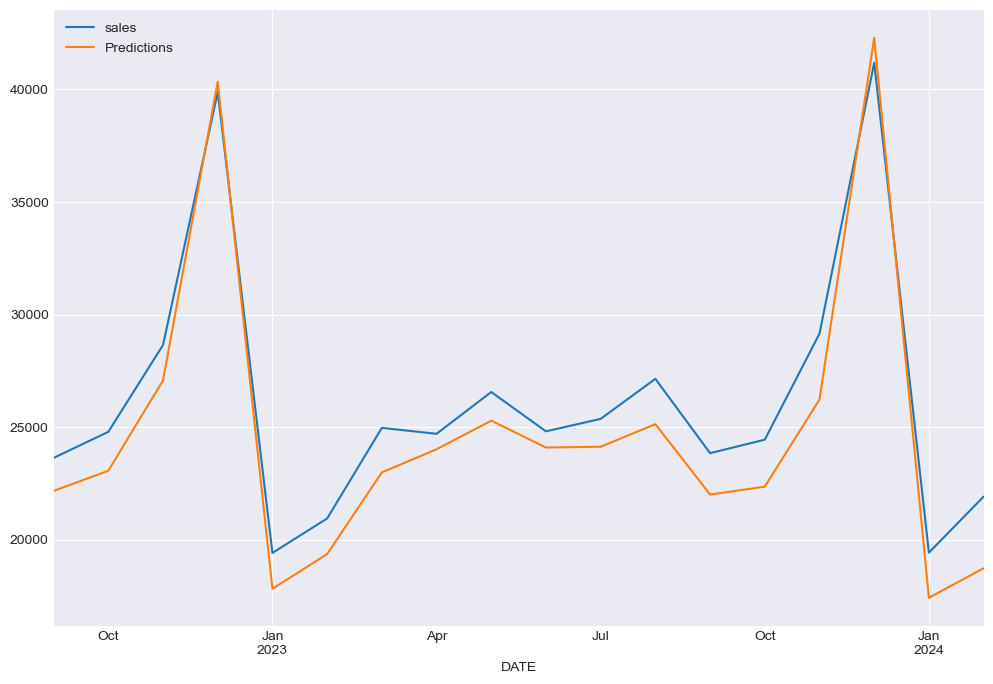

In [43]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [44]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [45]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [46]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [47]:
# compile the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# use early_stop
model.compile(optimizer='adam', loss='mse')

In [49]:
# fit the model
early_stop = EarlyStopping(monitor='loss',patience=5)

In [50]:
history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
374/374 [==============================] - 3s 3ms/step - loss: 0.0175
Epoch 2/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0127
Epoch 3/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 4/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 5/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 6/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 7/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 8/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 9/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 10/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 11/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 12/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 13/30
374/374 [====

C:\Users\Murali\AppData\Local\Temp\ipykernel_17744\117035865.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


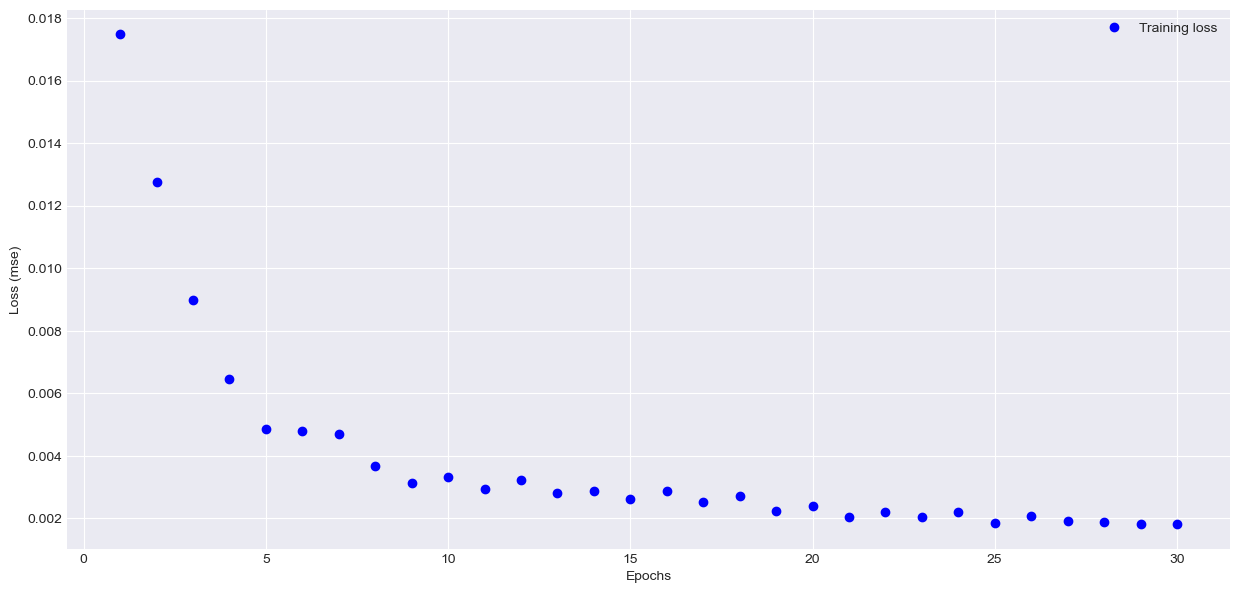

In [51]:
history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [52]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 16ms/step


In [53]:
forecast = scaler.inverse_transform(forecast)

In [54]:
forecast

array([[22420.39219618],
       [22875.59171343],
       [24262.72585654],
       [23683.96937919],
       [24043.9012804 ],
       [25520.28357601],
       [23403.9319818 ],
       [23700.88364482],
       [28414.41816545],
       [40452.95888805],
       [18769.74338269],
       [20866.80280972]])

### Creating new timestamp index with pandas.

In [55]:
df

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-10-01,24438.0
2023-11-01,29150.0
2023-12-01,41187.0


In [56]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [57]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [58]:
forecast_df

,Forecast
2024-01-01,22420.392196
2024-02-01,22875.591713
2024-03-01,24262.725857
2024-04-01,23683.969379
2024-05-01,24043.901280
2024-06-01,25520.283576
2024-07-01,23403.931982
2024-08-01,23700.883645
2024-09-01,28414.418165
2024-10-01,40452.958888


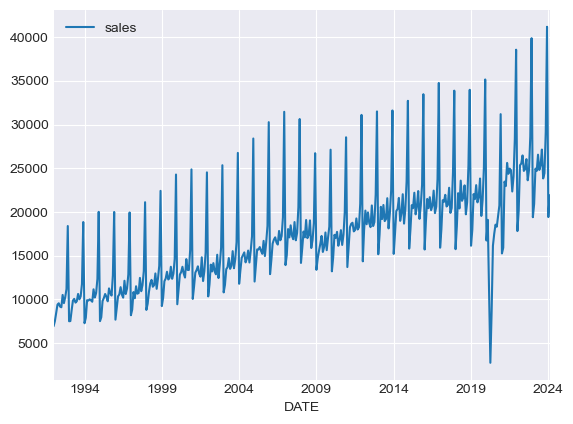

In [59]:
# Plot sales - Values in dataframe
df.plot();

<Axes: >

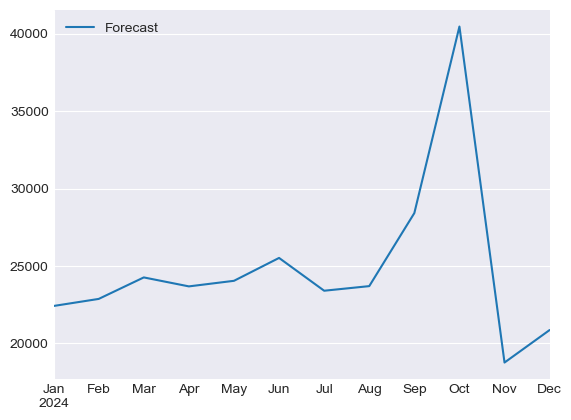

In [60]:
# Plot forecast - Values in forecast_df
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

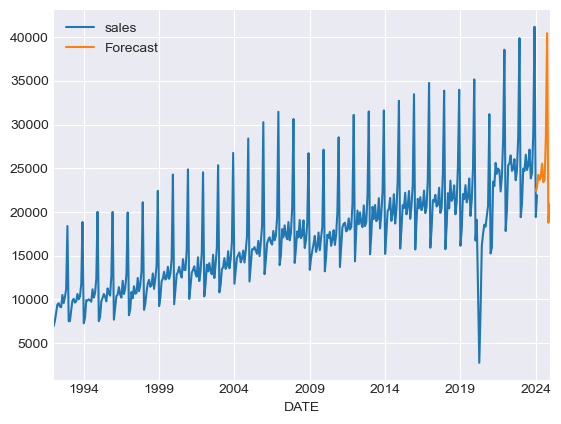

In [61]:
ax = df.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

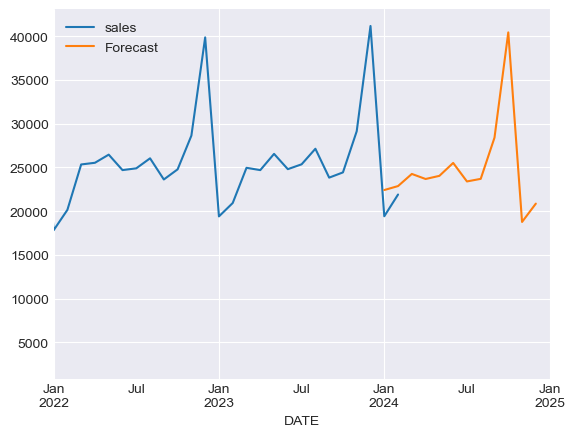

In [62]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!